## Initialization

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

from matplotlib import colors
from sklearn.preprocessing import MinMaxScaler

## Import Dataset

In [256]:
myFile = 'data/spy.csv'


df = pd.read_csv('data/spy.csv')
df = df.loc[df['Date'].between("2022-01-01", "2022-06-30")]
arr = df[['Open', 'High', 'Low', 'Close', 'Day', 'Week', 'Weekday']].to_numpy()

scaler = MinMaxScaler()
scaler.fit(arr)
arr = scaler.transform(arr)
arr = arr*2
arr = arr.round().astype(int)

# Divided matrix into 4 pieces 
arr = np.split(arr, 4) 

## Functions

In [262]:
# Given two integers, build a row x col matrix
def emptyMatrix(rows, cols):
    return np.zeros((rows, cols)).tolist()

# Given a matrix, return a list containing [row, col]
def getSize(matrix):
    rows = len(matrix)
    cols = len(matrix[0]) if rows > 0 else 0
    return (rows, cols)

# Given a matrix and a filename, insert the values into matrix and return it
def importValues(matrix, fName):
    num_rows = len(matrix)
    num_cols = len(matrix[0])

    with open(fName, 'r') as f:
        lines = f.readlines()
        for line in lines:
            row, col = [int(x) for x in line.strip().split()]
            if 0 <= row < num_rows and 0 <= col < num_cols:
                matrix[row][col] = 1
    return matrix

import copy
# Given a matrix, return the corresponding matrix for the next timestep
count = 0
def update(matrix): 
    global count
    matrix = arr[count]
    num_rows = len(matrix)
    num_cols = len(matrix[0])
    
    new_matrix = copy.deepcopy(matrix)
    
    for i in range(num_rows):
        for j in range(num_cols):
            live_neighbors = 0
            for x in range(i - 1, i + 2):
                for y in range(j - 1, j + 2):
                    if 0 <= x < num_rows and 0 <= y < num_cols and not (x == i and y == j):
                        if matrix[x][y] == 1:
                            live_neighbors += 1
            
            if matrix[i][j] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    new_matrix[i][j] = 0
            else:
                if live_neighbors == 3:
                    new_matrix[i][j] = 1
    count += 1
    return new_matrix

def updateFig(frameNum, img, matrix):
    if (frameNum == 0):
        return img    

    nm = update(matrix)
    matrix[:] = nm[:]
    img.set_data(nm)
    return img

def animate(matrix, steps, outname):
    matrix = np.array(matrix)
    cmap = colors.ListedColormap(['blue', 'yellow', 'red']) 
    bounds = [0, 1, 2, 3]

    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    plt.grid(False)
    img = ax.imshow(arr[0], cmap=cmap, norm=norm)
    ani = animation.FuncAnimation(fig, updateFig, fargs=(img, matrix), frames=steps)

    ani.save(outname, fps=2)


## Output

MovieWriter ffmpeg unavailable; using Pillow instead.


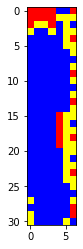

In [263]:
animate(arr, 4, 'yourOutput2.gif')